<a href="https://colab.research.google.com/github/khalidpark/whitepaper-DeepLearning/blob/main/deep_learning_whitepapaer_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 임베딩 모델 학습은 어떻게?
Word2Vec을 학습시키기 위해서는 충분히 큰 코퍼스를 학습시켜야 한다는 것을 알 수 있습니다. 다행인 것은 이미 충분히 큰 코퍼스들로 학습된 단어 임베딩을 쉽게 찾아 사용할 수 있다는 것입니다. 여러분이 지금까지 사용해온 Spacy 라이브러리의 모델도 Word2Vec 와 유사한 방식으로 학습한 임베딩을 제공합니다. 무지막지하게 큰 [Common Crawl](https://en.wikipedia.org/wiki/Common_Crawl) 데이터를 학습에 사용해 만든 모델이기 때문에 영어의 경우 충분히 대표성을 가진 임베딩이 나올 수 있을 것이라 생각할 수 있겠습니다.

이제 spacy를 통해 임베딩을 어떻게 사용하는지 살펴 봅시다.

In [1]:
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
import spacy
# 설치 후 에러가 나면 load할 때 , 런타임을 초기화 할 것.

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
!python --version

Python 3.7.10


In [3]:
nlp = spacy.load('en_core_web_lg')
tokens = nlp("Dogs and cats school gagasdf")

# vector_norm: 벡터의 크기
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm)

Dogs True 7.193099
and True 4.6577983
cats True 6.933004
school True 6.7380905
gagasdf False 0.0


입력한 문장에 대한 임베딩 벡터를 얻고 문장 간 유사도를 측정해 봅니다.

In [4]:
vects = tokens.vector
print(vects)

[-1.79408014e-01  1.26198798e-01 -1.11785397e-01 -2.83820003e-01
 -2.62799971e-02  5.58035970e-02 -1.45570010e-01 -5.27487993e-02
  1.69332191e-01  1.93045998e+00 -2.79807180e-01  1.38399795e-01
 -1.85558006e-01  5.02085984e-02 -1.40728995e-01  9.67558026e-02
  2.06080005e-01  8.19686055e-01 -1.57560199e-01 -6.11754060e-02
 -1.73499614e-01 -1.09055400e-01 -4.25813980e-02 -2.84800589e-01
  1.65506005e-01 -9.49792042e-02 -2.45875999e-01 -1.76592007e-01
  1.02721252e-01 -1.18426010e-01 -9.64230075e-02  2.92337183e-02
 -8.17720070e-02 -2.63900049e-02  2.31444001e-01  9.93599277e-03
  1.33631989e-01 -2.89353997e-01  8.05701874e-03  2.12559611e-01
  1.11464588e-02  1.04168795e-01  6.81307912e-03 -1.94971208e-02
  7.46979937e-02 -9.89580080e-02 -2.04918385e-01  1.74181998e-01
  1.38363212e-01 -1.74419403e-01 -8.65179971e-02 -2.17613988e-02
  1.88542008e-02  4.70872000e-02 -9.22998041e-02  2.23565191e-01
 -3.33181992e-02  6.36455938e-02 -2.20621794e-01  3.23160827e-01
  7.06618130e-02 -1.33299

In [5]:
# 벡터의 차원을 보겠습니다
len(vects)

300

In [6]:
# 두 문서를 만들어 코사인 유사도를 측정해 보겠습니다
doc1 = nlp("I found a wonderful restaurant")
doc2 = nlp("the food is delicious")

similarity = doc1.similarity(doc2)
print(similarity)

0.792971253536227


In [7]:
doc3 = nlp("The restaurant we found yesterday is wonderful")

print(doc1.similarity(doc3))

0.9173849797280267


단어 간에도 유사도를 확인할 수 있습니다.

In [8]:
car = nlp('car')
bus = nlp('bus')
human = nlp('human')
monkey = nlp('monkey')
lion = nlp('lion')
gorilla = nlp('gorilla')
avengers = nlp('avengers')
marvel = nlp('marvel')

print('car vs bus : ', car.similarity(bus))
print('bus vs human : ', bus.similarity(human))
print('human vs monkey : ', human.similarity(monkey))
print('human vs lion : ', human.similarity(lion))
print('monkey vs gorilla : ', monkey.similarity(gorilla))
print('avengers vs marvel : ', avengers.similarity(marvel))

car vs bus :  0.4816960149829203
bus vs human :  0.12412277316164501
human vs monkey :  0.39899946231157096
human vs lion :  0.27611871750909667
monkey vs gorilla :  0.6525881793034227
avengers vs marvel :  0.5988409089010447


### PCA를 사용한 벡터 시각화
300 차원인 벡터들은 시각화 하기 어렵기 때문에 PCA를 사용해 2차원으로 변환해 보겠습니다.

**Quiz. 다른 방식으로 시각화를 할 순 없는 지 알아보세요!**

In [9]:
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # 단어 벡터로 변환합니다
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'bus', 'human', 'man', 'woman', 'monkey', 'fish' , 'shark', 'lion', 'tiger', 'avengers', 'marvel', 'thor', 'comics', 'superhero']

# PCA 모델의 차원을 설정하여 
pca = PCA(n_components=2)

# Fit & Transform
word_vect_2d = pca.fit_transform(get_word_vectors(words))

# 각 벡터가 300 차원에서 2차원으로 줄어 든 것을 확인 할 수 있습니다
word_vect_2d

array([[-3.66200993, -3.32131749],
       [-3.546578  , -2.85085021],
       [-1.79310422, -3.71355107],
       [-3.06282644, -2.17552236],
       [-0.32817602,  1.3725565 ],
       [-1.07378983,  0.56357398],
       [-1.38479131,  0.34247838],
       [-0.32481679,  2.04812646],
       [-1.69068704,  3.8972493 ],
       [-0.79176752,  3.43002251],
       [-0.28481803,  2.75749512],
       [-0.77280682,  3.10963932],
       [ 4.97271183, -1.21201458],
       [ 2.90881958, -0.6911009 ],
       [ 3.43790293, -1.18524999],
       [ 3.76755523, -1.36028237],
       [ 3.62918236, -1.0112526 ]])

In [11]:
import matplotlib.pyplot as plt

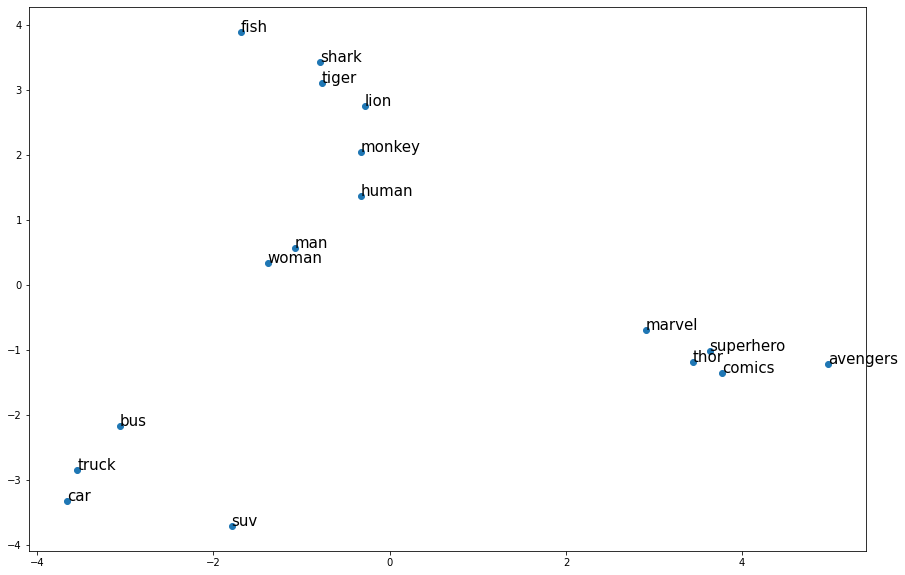

In [12]:
# 결과가 잘 보이도록 크기를 설정합니다
plt.figure(figsize=(15,10))

# 단어벡터를 그립니다
plt.scatter(word_vect_2d[:,0], word_vect_2d[:,1])

# 점 옆에 단어를 표시합니다
for word, coord in zip(words, word_vect_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

plt.show()

In [13]:
# 벡터 연산을 통해 단어간의 관계를 추론할 수 있습니다

from scipy.spatial.distance import cosine

king = nlp("king").vector
queen = nlp("queen").vector
man = nlp("man").vector
woman = nlp("woman").vector

# 단어벡터가 의미를 가진다면 다음과 같은 연산을 통해 result는 queen과 비슷한 뜻이 되겠지요?
result = king - man + woman

print("similarity between queen and (king - man + woman) : ", 1 - cosine(queen, result))

similarity between queen and (king - man + woman) :  0.7880843877792358




---

